# ERRORS

This Jupyter Notebook is a supplement for **Chapter 2. Machine Learning Fundamentals** of the [Machine Learning For Everyone](ml4everyonebook.com) book.

# 1. Bias-Variance Graph

## 1.1. Dataset & Variables

Let's first import the dataset we are going to use.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml4everyone/master/supplements/data/dataset_example1.csv', delimiter=',', header=0)

The data contains 112 observations

In [21]:
len(df)

112

and represents certain values of $x$ and certain values of $y$

In [22]:
df.head()

,x,y
0,2.2,3.1
1,1.4,6.4
2,1.4,9.1
3,4.9,6.2
4,6.3,4.7


Let's visualize $x$ and $y$ for a better picture of x-y relationship:

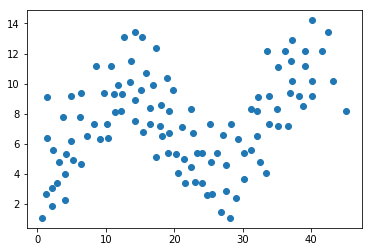

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.show()

## 1.2. Plotting Bias-Variance Graph

The goal is to plot the following graph for a polynomial model. The y-axis represents **error**, the x-axis represents **model's complexity** in terms of degrees of polynomial regression.

<img src="../supplements/img/bias_variance_graph.png" style="height:500px">

To plot this graph, we need to calculate the following values for each polynomial degree $d = 1,2,3,..,n$.
   - test error
   - training error
   - squared bias error
   - variance error
   - irreducible error $ \sigma_{\epsilon}^2 $
 

### 1.2.1. Polynomial Regression with different degrees

For that, we first need to split $x$ and $y$, into train and test sets. Let's take 92 observations into training set and 20 observations into test set.

In [12]:
x = [6,15,9,19,28,17.5,25.5,31.5,34.5,39,40.5,44,45,48.5,51,52,56,56,59.5,61,66]
y = [14,12,20,18.5,22,26.5,29.5,21.5,29.5,23,28,20,27.5,18.5,25,15,22,10,19,6.5,12]

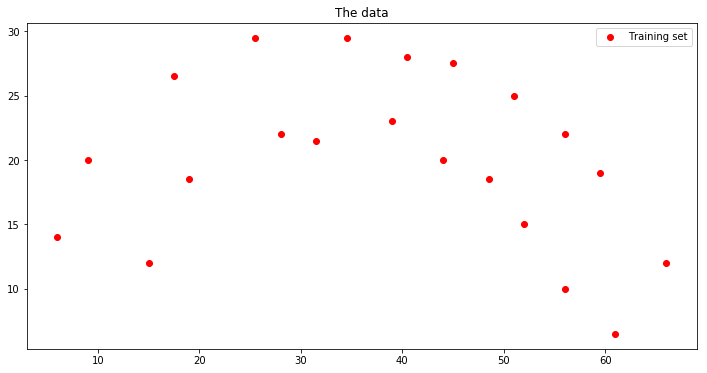

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='red', label='Training set')
plt.title('The data')
plt.legend(loc='best')

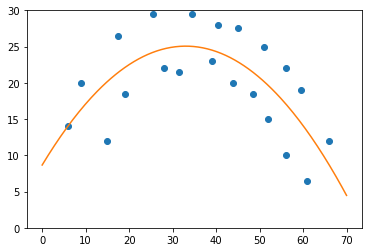

In [45]:
import numpy as np

degrees = 2
p = np.poly1d(np.polyfit(x, y, degrees))
t = np.linspace(0, 70, 200)
plt.ylim(0, 30)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

In [60]:
x_black = [6,15,28,17.5,34.5,39,45,48.5,56,56,66]
y_black = [14,12,22,26.5,29.5,23,27.5,18.5,22,10,12]

x_green = [9,19,25.5,31.5,40.5,44,51,52,59.5,61]
y_green = [20,18.5,29.5,21.5,28,20,25,15,19,6.5]

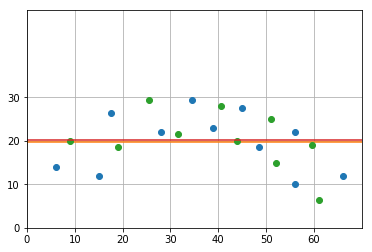

In [83]:
import numpy as np

degrees = 0
p_black = np.poly1d(np.polyfit(x_black, y_black, degrees))
t = np.linspace(0, 70, 200)

p_green = np.poly1d(np.polyfit(x_green, y_green, degrees))

plt.grid()
plt.xlim(0, 70)
plt.ylim(0, 50)
plt.xticks(np.arange(0,70,10))
plt.yticks(np.arange(0,40,10))

plt.plot(x_black, y_black, 'o', t, p_black(t), '-')
plt.plot(x_green, y_green, 'o', t, p_green(t), '-')
plt.show()

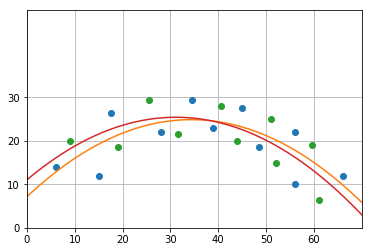

In [138]:
import numpy as np

degrees = 2
t = np.linspace(0, 70, 200)

p_black = np.poly1d(np.polyfit(x_black, y_black, degrees))
p_green = np.poly1d(np.polyfit(x_green, y_green, degrees))

plt.grid()
plt.xlim(0, 70)
plt.ylim(0, 50)
plt.xticks(np.arange(0,70,10))
plt.yticks(np.arange(0,40,10))

plt.plot(x_black, y_black, 'o', t, p_black(t), '-')
plt.plot(x_green, y_green, 'o', t, p_green(t), '-')
plt.show()

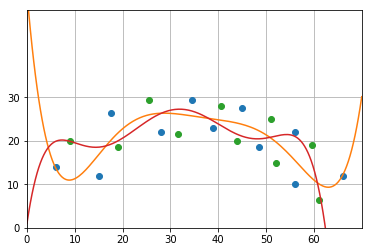

In [160]:
import numpy as np

degrees = 6
t = np.linspace(0, 70, 200)

p_black = np.poly1d(np.polyfit(x_black, y_black, degrees))
p_green = np.poly1d(np.polyfit(x_green, y_green, degrees))

plt.grid()
plt.xlim(0, 70)
plt.ylim(0, 50)
plt.xticks(np.arange(0,70,10))
plt.yticks(np.arange(0,40,10))

plt.plot(x_black, y_black, 'o', t, p_black(t), '-')
plt.plot(x_green, y_green, 'o', t, p_green(t), '-')
plt.show()

/Users/andrewwolf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/andrewwolf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


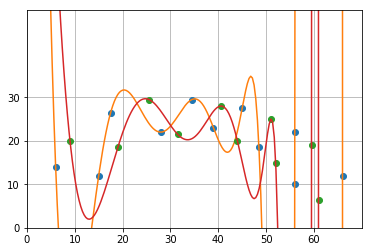

In [168]:
import numpy as np

degrees = 99
t = np.linspace(0, 70, 200)

p_black = np.poly1d(np.polyfit(x_black, y_black, degrees))
p_green = np.poly1d(np.polyfit(x_green, y_green, degrees))

plt.grid()
plt.xlim(0, 70)
plt.ylim(0, 50)
plt.xticks(np.arange(0,70,10))
plt.yticks(np.arange(0,40,10))

plt.plot(x_black, y_black, 'o', t, p_black(t), '-')
plt.plot(x_green, y_green, 'o', t, p_green(t), '-')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['x'],  # specify x
                                                    df['y'],  # specify y
                                                    test_size=20) # specify test size (train size = total observations in the dataset - test size)

For a better understanding of what train-test split does, we can visualize the graph that shows, out of all 112 observations, what datapoints are taken into a training set (red), and what datapoints are taken into a test set (blue):

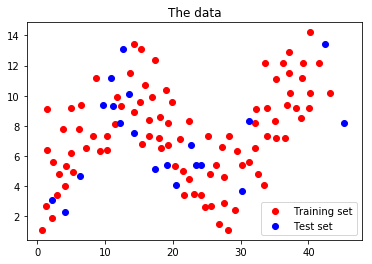

In [34]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='red', label='Training set')
plt.scatter(X_test, y_test, color='blue', label='Test set')
plt.title('The data')
plt.legend(loc='best')

### 1.2.2. Polynomial Regression with different degrees

Let's have a look at polynomial model fitted onto our dataset with **degrees = 1**:

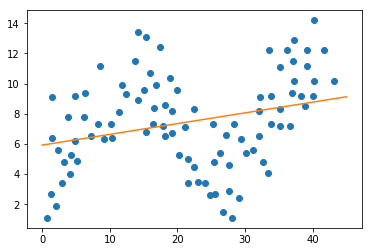

In [36]:
import numpy as np

degrees = 1
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

You can see that this model is **oversimplified** - i.e. has high bias. Let's try out polynomial model with **degrees = 2**:

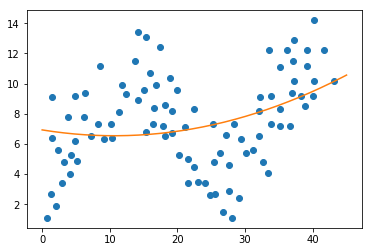

In [37]:
degrees = 2
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

This is better. As the model becomes more complicated, the curve captures more data on the graph. Let's try out polynomial model with **degrees = 9**:

In [65]:
degrees = 9
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

NameError: name 'X_train' is not defined

Now, with the degree = 9, the model is **too complicated**, as it pays attention to small variations across our dataset. In other words, the model has high variance. 

**The question is: what is the best number of degrees in polynomial model that would give us the most accurate results, and optimize bias and variance errors?**

For that, let's calculate the following four values **for each degree**, from 1 to 13.
   - test error
   - training error
   - squared bias error
   - variance error
 
> irreducible error $ \sigma_{\epsilon}^2 $ is just a constant, thus it's redundant

### 1.2.3. Calculating errors with different polynomial degrees

In [62]:
#Reshaping X and y

X_train = np.array(X_train)
X_train = np.reshape(X_train, (-1, 1))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (-1, 1))

y_train = np.array(y_train)
y_train = np.reshape(y_train, (-1, 1))
    
y_test = np.array(y_test)
y_test = np.reshape(y_test, (-1, 1))

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

test_error = []
train_error = []
bias_squared = []
variance_squared = []

degrees = range(1, 13)

for deg in degrees:
    # Define and train features on Polynomial
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_X_train = poly.fit_transform(X_train)
    
    # Fit into Linear regression (required for building polynomial regression, learn more on how a polynomial is built in scikit-learn)
    reg = LinearRegression().fit(poly_X_train, y_train)
    
    # Predict y_train
    poly_predict_y_train = reg.predict(poly_X_train)

    # Predict y_test
    poly_X_test = poly.fit_transform(X_test)
    poly_predict_y_test = reg.predict(poly_X_test)
    
    
    test_error.append(np.mean((poly_predict_y_test - y_test) ** 2))
    train_error.append(np.mean((poly_predict_y_train - y_train) ** 2))
    bias_squared.append((np.mean(poly_predict_y_test, 1) - y_test) ** 2)
    variance_squared.append( np.mean( (poly_predict_y_test-np.mean(poly_predict_y_test))**2 ) )
    
    
    

### 1.2.4. Visualizing Bias-Variance graph

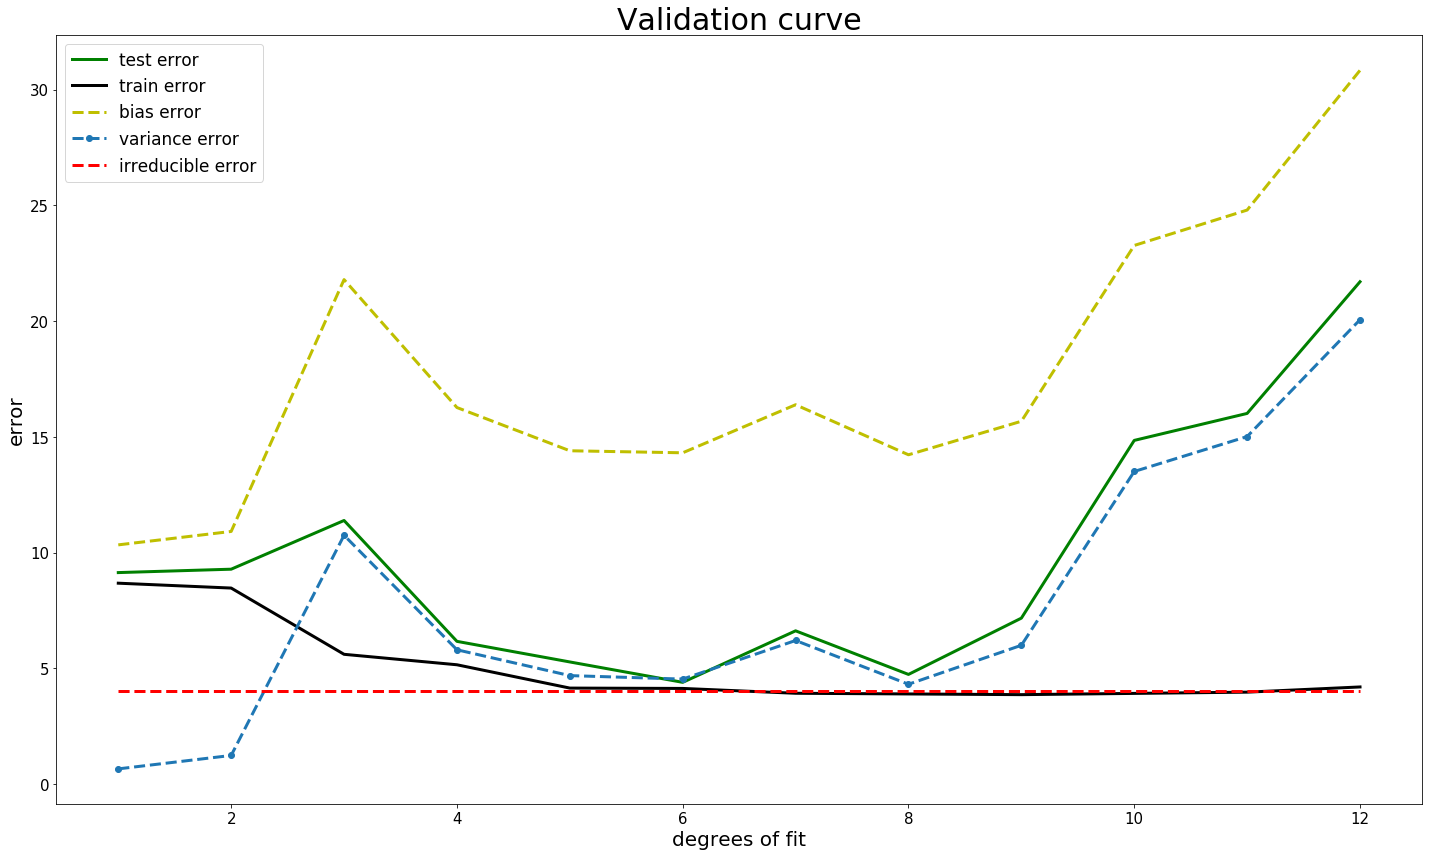

In [54]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(20, 12))

# Test error
plt.plot(degrees, test_error, 'g', linewidth=3.0, label='test error')

# Train error
plt.plot(degrees, train_error, 'k', linewidth=3.0, label='train error')

# Bias error
plt.plot(degrees, np.mean(np.mean(bias_squared, 1), 1), 'y--', linewidth=3.0, label='bias error')

# Variance error
plt.plot(degrees, variance_squared, 'o--', linewidth=3.0, label='variance error')

#Irreducible error
plt.plot(degrees, 4 * np.ones_like(degrees), 'r--', linewidth=3.0, label='irreducible error')

plt.legend(loc='best', prop={'size':17})
plt.xlabel('degrees of fit', size = 20)
plt.ylabel('error', size = 20)
plt.title('Validation curve', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.tight_layout()

We see that with the degrees = 5, 6 or 8, the model has minimum train and test error. Let's draw a polynomial function with 10 degrees to how it will look like.

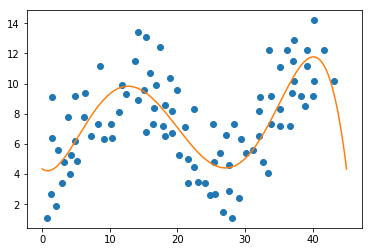

In [60]:
degrees = 5
p = np.poly1d(np.polyfit(X_train.reshape(-1, ), y_train.reshape(-1, ), degrees))
t = np.linspace(0, 45, 200)

plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.show()

Looks good.

# 3. Validation curve

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

train_scores, validation_scores = validation_curve(model, 
                                                   df['x'][:, np.newaxis], 
                                                   df['y'],
                                                   param_name='polynomialfeatures__degree',
                                                   param_range=degrees)

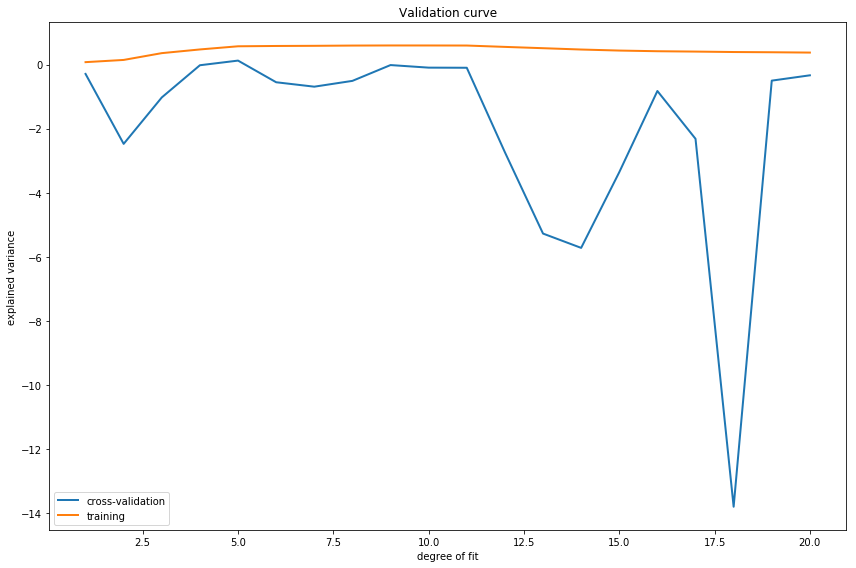

In [73]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(12, 8))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2, label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

# 4. Learning Curve

## 4.1. Dataset & Variables

Firstly, let's import the dataset:

In [74]:
import pandas as pd  #library to import and handle tables

df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml4everyone/master/supplements/data/car_price.csv', delimiter=',', header=0)
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


Let's define $X$ and $y$ variables for our model.

In [ ]:
df_X = df[['enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
df_y = df['price']

## 4.2. Defining training size for Learning Curve

Let's start with the learning curve. A learning curve plots the score over varying numbers of **training examples**. Let's plot the graph with changing data size to see how the score of the model benefits from more data. Let's use Linear Regression Model and k-fold cross validation to test and validate our model.

First of all, let's see how many observations we have in total:

In [76]:
len(df)

205

Our training set has 205 instances, so the maximum value is 205. However, we haven’t yet put aside a validation set. We’ll do that using an 80:20 ratio, ending up with a training set of 164 instances (80%), and a validation set of 41 instances (20%). Given that our training set will have 164 instances, the maximum value we can use to generate our learning curves is 164. For our case, here, we use these six sizes:

In [78]:
train_sizes = [1, 32, 65, 97, 130, 164]

## 4.3. Calculating errors

Now let's create a function learning_curve() to generate the data needed to plot a learning curve. The function returns a tuple containing three elements: the training set sizes, and the error scores on both the validation sets and the training sets.

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve


train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),      #indicates the learning algorithm we use to estimate the true model;
                                                              X = df_X,                            #the data containing the features
                                                              y = df_y,                            #the data containing the target
                                                              train_sizes = train_sizes,           #specifies the training set sizes to be used;
                                                              cv = 5,                              #determines the cross-validation splitting strategy (we’ll discuss this immediately);
                                                              shuffle=True,                        #set shuffle to true
                                                              scoring = 'neg_mean_squared_error'   #indicates the error metric to use: the intention is to use the mean squared error (MSE) metric, but that’s not a possible parameter for scoring; we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later on.
                                                             )



We create a learning_curve() to generate the data needed to plot a learning curve. The function returns a tuple containing three elements: the training set sizes, and the error scores on both the validation sets and the training sets. 

Inside the function, we use the following parameters:
- estimator — indicates the learning algorithm we use to estimate the true model;
- X — the data containing the features;
- y — the data containing the target;
- train_sizes — specifies the training set sizes to be used;
- cv — determines the cross-validation splitting strategy (we’ll discuss this immediately);
- scoring — indicates the error metric to use; the intention is to use the mean squared error (MSE) metric, but that’s not a possible parameter for scoring; we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs, as follows:

In [80]:
#flipping the signs

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

We already know what’s in train_sizes. Let’s inspect the other two variables to see what learning_curve() returned:

In [81]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[       -0.                -0.                -0.
         -0.                -0.        ]
 [ -5219813.97927136  -3801917.25475913  -3863972.37273211
  -12538836.92228111  -7633192.20333249]
 [ -8582199.84597553  -7188903.50588658  -8285549.83847829
   -9181005.30280751 -11816323.92739721]
 [-11348066.4665344  -10628825.6801144  -14513200.18787857
  -10793381.67623978 -11512531.71296353]
 [-12292652.44156391  -9763644.26540274 -13493263.72335362
  -12303706.29691708 -13583993.9562767 ]
 [-12066511.69084682 -10595950.86039569 -12069288.31207311
  -12627044.43130114 -12253938.95415191]]

 ----------------------------------------------------------------------

Validation scores:

 [[-1.09811089e+08 -1.39760493e+08 -2.06347852e+07 -8.95857318e+08
  -2.16138730e+07]
 [-1.14423748e+07 -4.27734934e+07 -2.48858572e+07 -1.12614719e+07
  -9.11080632e+06]
 [-2.18228313e+07 -4.06497879e+07 -1.90950077e+07 -1.14150112e+07
  -1.68601667e+07]
 [-1.56410900e+07 -2.30488855e+07 -1.6

Since we specified six training set sizes, you might have expected six values for each kind of score. Instead, we got six rows for each, and every row has five error scores. This happens because learning_curve() runs a k-fold cross-validation under the hood, where the value of k is given by what we specify for the cv parameter. In our case, cv = 5, so there will be five splits. For each split, an estimator is trained for every training set size specified. Each column in the two arrays above designates a split, and each row corresponds to a test size.


To plot the learning curves, we need only a single error score per training set size, not 5. For this reason, in the next code cell we take the mean value of each row and also flip the signs of the error scores (as discussed above).

In [82]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000e+00
32     6.611547e+06
65     9.010796e+06
97     1.175920e+07
130    1.228745e+07
164    1.192255e+07
dtype: float64

 --------------------

Mean validation scores

 1      2.375355e+08
32     1.989480e+07
65     2.196856e+07
97     1.642243e+07
130    1.748607e+07
164    1.749172e+07
dtype: float64


Now we have all the data we need to plot the learning curves.

## 4.4. Visualization

Let's plot the learning curve using `matplotlib.pyplot` library.

(-11876775.587988755, 249412287.34776384)

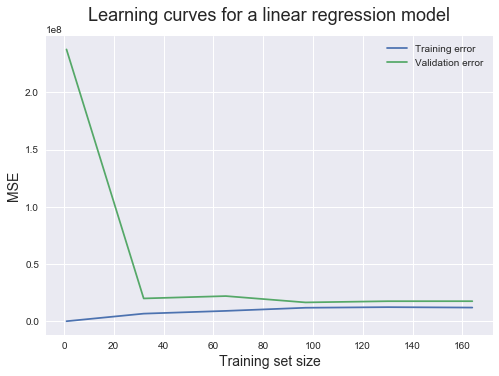

In [83]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim()

There’s a lot of information we can extract from this plot. Let’s proceed granularly. When the training set size is 1, we can see that the MSE for the training set is 0. This is normal behavior, since the model has no problem fitting perfectly a single data point. So when tested upon the same data point, the prediction is perfect. But when tested on the validation set (which has 1914 instances), the MSE rockets up to roughly 423.4. This relatively high value is the reason we restrict the y-axis range between 0 and 40. This enables us to read most MSE values with precision. Such a high value is expected, since it’s extremely unlikely that a model trained on a single data point can generalize accurately to 1914 new instances it hasn’t seen in training. When the training set size increases to 100, the training MSE increases sharply, while the validation MSE decreases likewise.

The linear regression model doesn’t predict all 100 training points perfectly, so the training MSE is greater than 0. However, the model performs much better now on the validation set because it’s estimated with more data. From 500 training data points onward, the validation MSE stays roughly the same. This tells us something extremely important: adding more training data points won’t lead to significantly better models. So instead of wasting time (and possibly money) with collecting more data, we need to try something else, like switching to an algorithm that can build more complex models.

# 5. Calculating Scores

$ MSE = E \ [(y-\hat{f}(x))^2] $

In [169]:
test_squared_error = np.mean((poly_predict_y_test - y_test) ** 2)

In [170]:
test_squared_error

21.69888408838009

$Train \ Score$

In [171]:
train_squared_error = np.mean((poly_predict_y_train - y_train) ** 2)

In [172]:
train_squared_error

14.67276157398171

In [188]:
poly_predict_y_test

array([[ 9.60060606],
       [10.38009029],
       [ 4.80926666],
       [ 9.16729874],
       [ 4.30586253],
       [ 8.08864239],
       [ 5.81649664],
       [ 8.21358099],
       [26.01077079],
       [ 6.09276174],
       [ 8.33747796],
       [ 9.84440552],
       [ 7.42894468],
       [ 5.84528923],
       [ 6.54849975],
       [ 6.86914367],
       [ 3.92147049],
       [ 9.50776253],
       [ 8.94331351],
       [ 5.81126081]])

$ Bias = ( \ E[\hat{f}(x)] - f(x) \ )^2 $

In [189]:
bias_squared = (np.mean(poly_predict_y_test) - X_test) ** 2

In [190]:
sum(bias_squared)

array([4747.25148375])

$ Variance = E \ [(\hat{f}(x)-E[\hat{f}(x)])^2] $

In [201]:
var_y_hat_test = np.var(poly_predict_y_test)

In [202]:
var_y_hat_test

20.059281166238186